In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
from PIL import Image

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.optimizers import Adam


from keras.utils import to_categorical

import tensorflow.keras.backend as K

In [4]:
import os
from glob import glob

# Path to the train directory containing class folders
train_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\train'

# Get a list of all subdirectories (class folders) in the train directory
class_names = [os.path.basename(cls) for cls in glob(os.path.join(train_dir, '*'))]

# Create a dictionary mapping class names to numerical indices
class_ind = {class_names[i]: i for i in range(len(class_names))}

print("Class names:", class_names)
print("Class indices:", class_ind)


Class names: ['Burger King', 'KFC', 'McDonalds', 'Other', 'Starbucks', 'Subway']
Class indices: {'Burger King': 0, 'KFC': 1, 'McDonalds': 2, 'Other': 3, 'Starbucks': 4, 'Subway': 5}


In [6]:
import os
from glob import glob

# Define the path to the dataset directory containing class folders
dataset_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\train'

# Initialize dictionaries to store image names and image counts per class
image_names = {}
count_list = {}

# Iterate over each class (subdirectory) in the dataset directory
for class_name in class_names:
    # Construct the glob pattern to match all image files within the current class directory
    image_pattern = os.path.join(dataset_dir, class_name, '*')
    
    # Use glob to get a list of image file paths for the current class
    image_files = glob(image_pattern)
    
    # Store the list of image file paths in the image_names dictionary
    image_names[class_name] = image_files
    
    # Count the number of images for the current class
    num_images = len(image_files)
    
    # Store the count in the count_list dictionary
    count_list[class_name] = num_images

# Output the count_list dictionary containing the number of images per class
print("Number of images per class:")
print(count_list)


Number of images per class:
{'Burger King': 297, 'KFC': 70, 'McDonalds': 189, 'Other': 825, 'Starbucks': 233, 'Subway': 124}


In [7]:
dataset = pd.DataFrame(list(count_list.items()),columns=['name','number'])
dataset

name  number
0  Burger King     297
1          KFC      70
2    McDonalds     189
3        Other     825
4    Starbucks     233
5       Subway     124

In [8]:
import random
r = lambda: random.randint(0,255)
col = lambda : ('#%02X%02X%02X' % (r(),r(),r()))

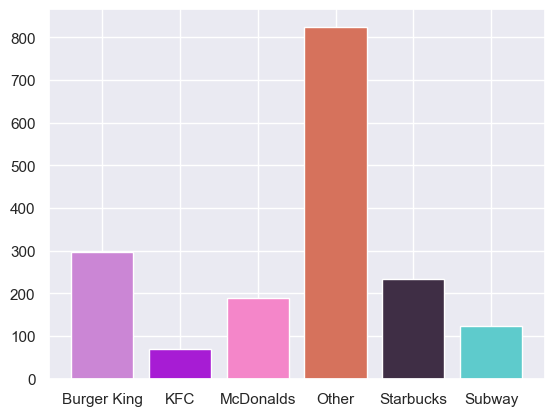

In [9]:
import seaborn as sns
sns.set(style="darkgrid")
ax = plt.bar(dataset['name'],dataset['number'] , color = [col() for i in range(6)])
plt.show()

In [10]:
sns.set_style("whitegrid", {'axes.grid' : False})

Classwise Pics 

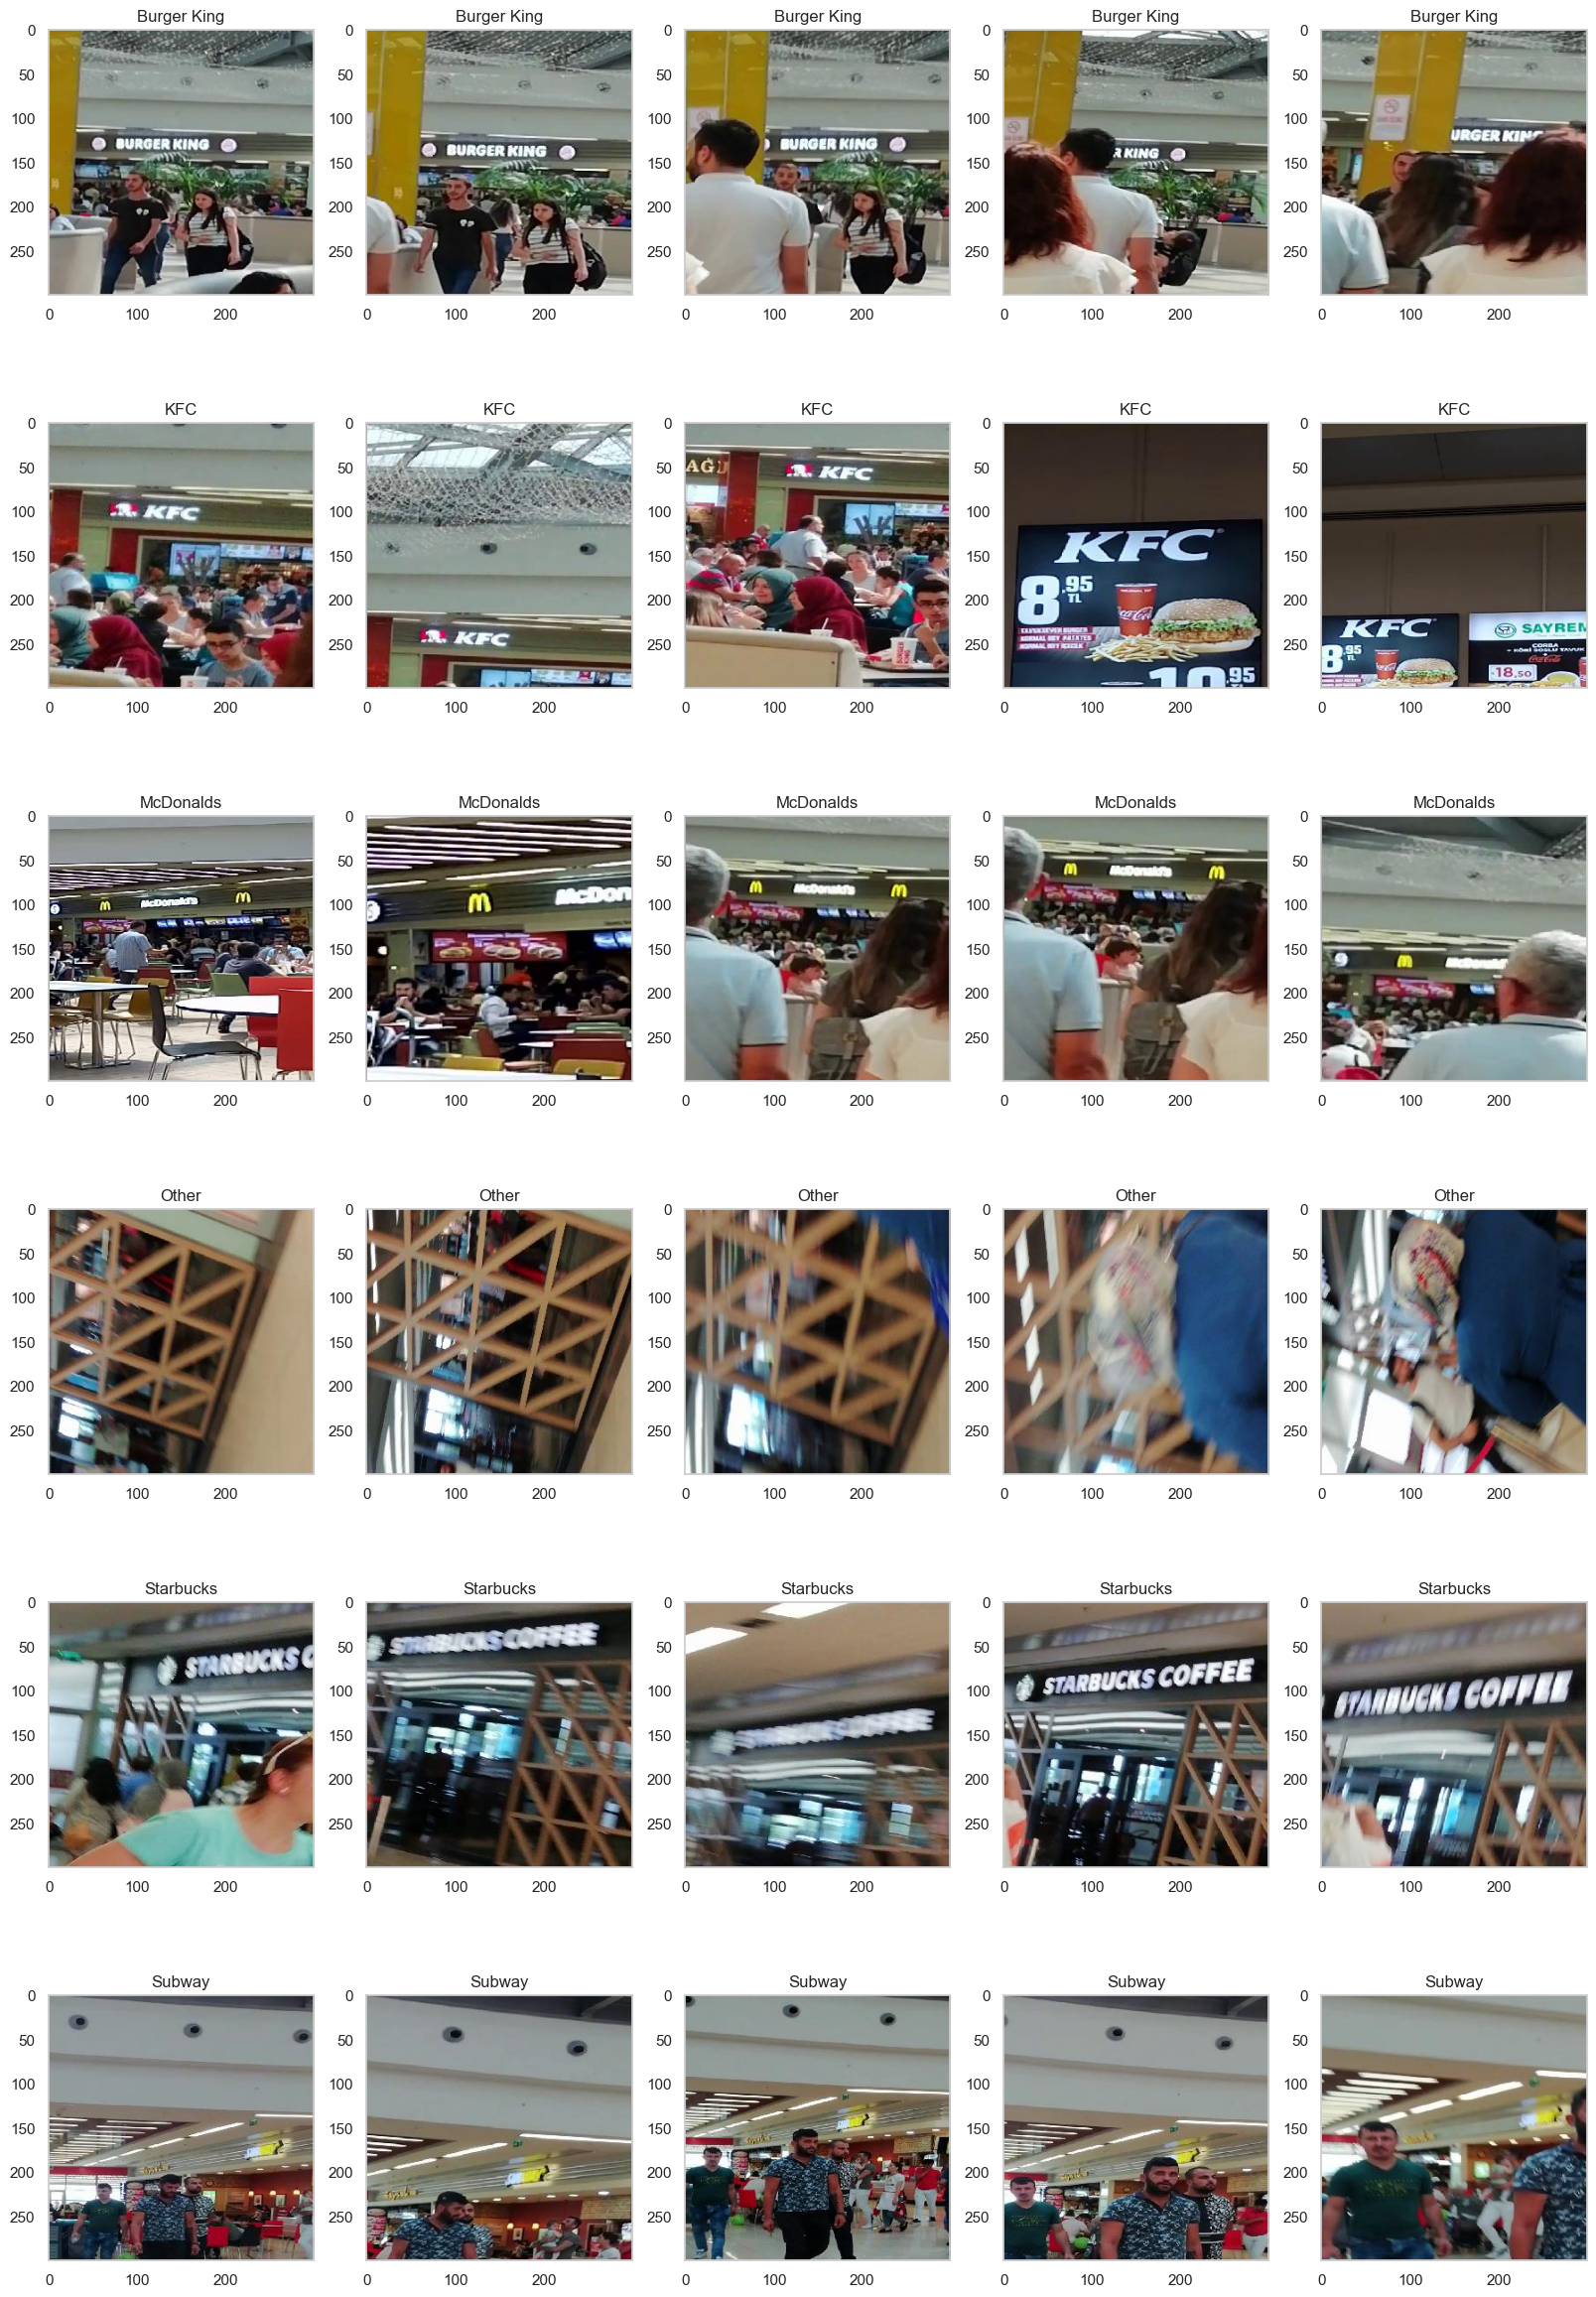

In [11]:
j = 0
fig, axs = plt.subplots(6, 5, figsize=(20, 30))
for class_name in class_names:
    class_wise_names = image_names[class_name]
    i = 0
    for img_name in class_wise_names[:5]:
        img = Image.open(img_name)
        img = np.array(img)
        axs[j][i].imshow(img)
        axs[j][i].set_title(class_name)
        i+=1
    j+=1

In [14]:
import os
from PIL import Image

# Define input and output directories
input_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\train'
output_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\resized_train'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Desired image size
target_size = (224, 224)

# Iterate through each class directory
for class_name in os.listdir(input_dir):
    class_dir = os.path.join(input_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)
    os.makedirs(output_class_dir, exist_ok=True)
    
    # Resize images and save to output directory
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(class_dir, filename)
            img = Image.open(img_path)
            
            # Resize the image with the specified target size and using Lanczos resampling
            img_resized = img.resize(target_size, Image.LANCZOS)
            
            output_path = os.path.join(output_class_dir, filename)
            img_resized.save(output_path)

print("Image resizing completed.")


Image resizing completed.


In [15]:
from sklearn.model_selection import train_test_split
import shutil

# Define directories for training and validation data
train_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\resized_train'
output_train_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\train_split'
output_val_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\val_split'

# Create output directories for training and validation data
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_val_dir, exist_ok=True)

# Iterate through each class directory in the resized train directory
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
    
    # Split images into train and validation sets
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Copy train images to output train directory
    output_train_class_dir = os.path.join(output_train_dir, class_name)
    os.makedirs(output_train_class_dir, exist_ok=True)
    for img in train_images:
        shutil.copy(img, output_train_class_dir)
    
    # Copy validation images to output validation directory
    output_val_class_dir = os.path.join(output_val_dir, class_name)
    os.makedirs(output_val_class_dir, exist_ok=True)
    for img in val_images:
        shutil.copy(img, output_val_class_dir)

print("Data splitting into train and validation sets completed.")


Data splitting into train and validation sets completed.


In [20]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
import numpy as np
import os

# Load pre-trained VGG-16 model
vgg_model = VGG16(weights='imagenet', include_top=True)  # include_top=True includes the fully connected layers
vgg_model.summary()

# Load pre-trained ResNet-50 model
resnet_model = ResNet50(weights='imagenet', include_top=True)
resnet_model.summary()

# Example usage of the models for image prediction
def predict_image(model, img_path, preprocess_input_fn, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    preds = model.predict(x)
    decoded_preds = image.decode_predictions(preds, top=3)[0]  # Get top 3 predicted classes
    return decoded_preds

# Specify the directory containing images for prediction
img_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\resized_train'

# Check if the directory exists
if not os.path.exists(img_dir):
    print(f"Error: Directory '{img_dir}' not found.")
    exit(1)

# Iterate through images in the directory and predict using both models
for filename in os.listdir(img_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(img_dir, filename)
        
        # Example usage of VGG-16 model for image prediction
        decoded_preds_vgg = predict_image(vgg_model, img_path, vgg_preprocess_input)
        print(f"VGG-16 Predictions for '{filename}':", decoded_preds_vgg)
        
        # Example usage of ResNet-50 model for image prediction
        decoded_preds_resnet = predict_image(resnet_model, img_path, resnet_preprocess_input)
        print(f"ResNet-50 Predictions for '{filename}':", decoded_preds_resnet)


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_9[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define the number of classes in your dataset
num_classes = 6  # Replace with the actual number of classes

# Load pre-trained VGG-16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Add new fully connected layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add new fully connected layer with 256 units
output = Dense(num_classes, activation='softmax')(x)  # Use num_classes for the output layer

# Create a new model with modified top layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with the Adam optimizer and learning rate
optimizer = Adam(learning_rate=0.001)  # Specify the learning rate here
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the number of classes in your dataset
num_classes = 6  # Replace with the actual number of classes

# Load pre-trained VGG-16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new fully connected layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add new fully connected layer with 256 units
output = Dense(num_classes, activation='softmax')(x)  # Use num_classes for the output layer

# Create a new model with modified top layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with the Adam optimizer and learning rate
optimizer = Adam(learning_rate=0.001)  # Specify the learning rate here
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Specify the directory containing training and validation data
train_data_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\train'

# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
epochs = 10  # Number of epochs for training
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Save the trained model
model.save('trained_model.h5')


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 1393 images belonging to 6 classes.
Found 345 images belonging to 6 classes.
Epoch 1/10


C:\Users\sumit\anaconda4\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.5693 - loss: 2.4996 - val_accuracy: 0.8957 - val_loss: 0.3542
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.9750 - loss: 0.1064 - val_accuracy: 0.9246 - val_loss: 0.2334
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - accuracy: 0.9995 - loss: 0.0257 - val_accuracy: 0.9507 - val_loss: 0.1816
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9478 - val_loss: 0.1776
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.9478 - val_loss: 0.1782
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9420 - val_loss: 0.1811
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9449 - val_loss: 0.1721
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9478 - val_loss: 0.

In [26]:
# Save the trained model
model.save('trained_model.keras')

In [29]:
from tensorflow.keras.models import load_model

# Load the trained model (assuming 'trained_model.keras' is saved)
model = load_model('trained_model.keras')

# Specify the directory containing validation data
validation_data_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\val_split'

# Set up an ImageDataGenerator for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model using the validation generator
evaluation = model.evaluate(validation_generator)

# Display the evaluation metrics (e.g., loss and accuracy)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])


Found 349 images belonging to 6 classes.


C:\Users\sumit\anaconda4\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 32 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9678 - loss: 0.1151
Validation Loss: 0.08854944258928299
Validation Accuracy: 0.9713466763496399


In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained VGG-16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze specific layers for fine-tuning
# Here, we unfreeze the last convolutional block (block5) of VGG-16
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add new fully connected layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add new fully connected layer with 256 units
output = Dense(num_classes, activation='softmax')(x)  # Use num_classes for the output layer

# Create a new model with modified top layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with a lower learning rate for fine-tuning
optimizer = Adam(learning_rate=0.0001)  # Use a smaller learning rate for fine-tuning
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Specify the directory containing training and validation data
train_data_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\train'

# Set up data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Fine-tune the entire model
epochs = 4  # Number of epochs for fine-tuning
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Save the fine-tuned model
model.save('fine_tuned_model.keras')


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 13,503,750 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Found 1393 images belonging to 6 classes.
Found 345 images belonging to 6 classes.
Epoch 1/4
44/44 ━━━━━━━━━━━━━━━━━━━━ 213s 5s/step - accuracy: 0.6615 - loss: 0.9866 - val_accuracy: 0.7565 - val_loss: 0.5544
Epoch 2/4
44/44 ━━━━━━━━━━━━━━━━━━━━ 210s 5s/step - accuracy: 0.9144 - loss: 0.2884 - val_accuracy: 0.8435 - val_loss: 0.4149
Epoch 3/4
44/44 ━━━━━━━━━━━━━━━━━━━━ 211s 5s/step - accuracy: 0.9589 - loss: 0.1449 - val_accuracy: 0.9101 - val_loss: 0.2486
Epoch 4/4
44/44 ━━━━━━━━━━━━━━━━━━━━ 210s 5s/step - accuracy: 0.9716 - loss: 0.0880 - val_accuracy: 0.9362 - val_loss: 0.2580


In [32]:
from tensorflow.keras.models import load_model

# Load the fine-tuned model (assuming 'fine_tuned_model.h5' is saved)
model = load_model('fine_tuned_model.keras')

# Specify the directory containing validation data
validation_data_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\Deep Learning_R4\logos3\val_split'

# Set up an ImageDataGenerator for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the fine-tuned model using the validation generator
evaluation = model.evaluate(validation_generator)

# Display the evaluation metrics (e.g., loss and accuracy)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])


Found 349 images belonging to 6 classes.


C:\Users\sumit\anaconda4\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 62 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9655 - loss: 0.1281
Validation Loss: 0.15745997428894043
Validation Accuracy: 0.9598853588104248
